## Imports

In [1]:
import pandas as pd             
import numpy as np               
import matplotlib.pyplot as plt 
import seaborn as sns         

In [2]:
listings = pd.read_csv('../data/listings-3.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,827736378366911479,https://www.airbnb.com/rooms/827736378366911479,20230327145536,2023-03-27,city scrape,Legion 1BR/1BA,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475630606,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,592589963829194972,https://www.airbnb.com/rooms/592589963829194972,20230327145536,2023-03-28,city scrape,Club Wyndham Royal Vista,"Located directly on the beach, the property si...",NaN,https://a0.muscache.com/pictures/8a429c15-ea50...,66506549,...,NaN,NaN,NaN,NaN,f,5,0,5,0,NaN
2,772438920837360569,https://www.airbnb.com/rooms/772438920837360569,20230327145536,2023-03-27,city scrape,Relaxing 5 Acre Ranch home with private pond!,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,382318476,...,5.0,5.00,5.00,NaN,f,1,1,0,0,0.65
3,33271346,https://www.airbnb.com/rooms/33271346,20230327145536,2023-03-28,city scrape,Beach Escape – One Block from the Beach!,Newly constructed and beautifully renovated Ke...,Pompano world-famous coastline is a very popul...,https://a0.muscache.com/pictures/0f2305d2-7400...,118856968,...,4.8,4.88,4.68,NaN,t,3,3,0,0,2.69
4,484515,https://www.airbnb.com/rooms/484515,20230327145536,2023-03-28,city scrape,MIAMI- AMAZING APARTMENT OVER BEACH,<b>The space</b><br />The apartment is located...,NaN,https://a0.muscache.com/pictures/6791581/6de56...,637272,...,4.6,4.64,4.44,NaN,f,6,6,0,0,0.21


In [4]:
listings.shape

(16899, 75)

In [5]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16899 entries, 0 to 16898
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16899 non-null  int64  
 1   listing_url                                   16899 non-null  object 
 2   scrape_id                                     16899 non-null  int64  
 3   last_scraped                                  16899 non-null  object 
 4   source                                        16899 non-null  object 
 5   name                                          16898 non-null  object 
 6   description                                   16673 non-null  object 
 7   neighborhood_overview                         10460 non-null  object 
 8   picture_url                                   16899 non-null  object 
 9   host_id                                       16899 non-null 

In [7]:
# Remove non-numeric characters and convert 'price' column to float
listings['price'] = listings['price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Convert 'price' column to 'int64'
listings['price'] = listings['price'].astype('int64')

In [8]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2837
Length: 75, dtype: int64

In [9]:
# Fill 'reviews_per_month' column with '0'
listings['reviews_per_month'].fillna(0, inplace=True)

In [10]:
# List of irrelevant columns
irrelevant_columns = ['listing_url', 'scrape_id','bathrooms','neighbourhood_group_cleansed','source', 'picture_url', 'host_id', 'host_url', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# Remove irrelevant columns from listings DataFrame
listings_cleaned_columns = listings.drop(columns=irrelevant_columns)


In [11]:
listings_cleaned_columns.isna().sum()

id                           0
last_scraped                 0
name                         1
description                226
neighborhood_overview     6439
host_name                    1
host_location             4773
neighbourhood             6439
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              17
bedrooms                  1332
beds                       197
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
minimum_minimum_nights       0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
last_review               2837
reviews_per_month            0
dtype: int64

In [15]:
# Drop 'NaN' values
listings_cleaned_columns_dropped = listings_cleaned_columns.dropna(subset=['bathrooms_text', 'bedrooms', 'beds','last_review'], inplace =True)


In [16]:
# Fill 'NaN' values
listings_cleaned_columns_filled = listings_cleaned_columns.fillna({
    'name': 'Unnamed', 
    'description': 'No description available',
    'neighborhood_overview': 'No description available', 
    'host_name': 'Unnamed',
    'host_location': 'No location',
    'neighbourhood': 'None',
})

In [17]:
listings_cleaned_columns_filled.isna().sum()

id                        0
last_scraped              0
name                      0
description               0
neighborhood_overview     0
host_name                 0
host_location             0
neighbourhood             0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
minimum_minimum_nights    0
maximum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
maximum_nights_avg_ntm    0
last_review               0
reviews_per_month         0
dtype: int64

In [50]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Display all rows of the 'price' column
print(listings_cleaned_columns_filled['price'])

date
2023-01-02       500
2023-02-21       186
2021-03-19       297
2022-10-20       162
2022-09-06       258
2023-03-01       100
2023-03-15        63
2022-05-05       300
2023-01-08       218
2023-03-26       155
2022-12-12      1764
2023-03-22        91
2023-02-13        60
2023-02-14       313
2023-02-01       236
2023-03-18       440
2023-01-24       345
2022-04-11       176
2023-03-11       235
2023-03-20       450
2020-01-05        55
2020-03-22        80
2023-02-12        40
2022-10-01       803
2023-03-25       209
2023-03-13       645
2023-03-19       547
2023-03-18       239
2023-03-12       186
2023-02-20       161
2023-03-02       151
2023-03-04       170
2023-03-06       169
2022-07-05       298
2023-03-24       147
2022-06-18       300
2023-03-18       720
2023-03-27       236
2023-03-27       148
2023-03-02       327
2023-03-17       190
2022-02-19       299
2023-03-09       286
2023-03-26       378
2023-02-27       154
2022-03-02       118
2023-02-13       141
2023-03-

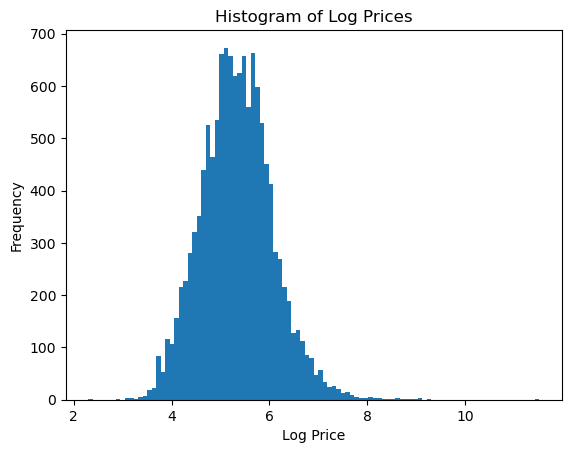

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Take the logarithm of the 'price' column
log_prices = np.log(listings_cleaned_columns_filled['price'])

# Create a histogram of the log prices
plt.hist(log_prices, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log Prices')
plt.show()


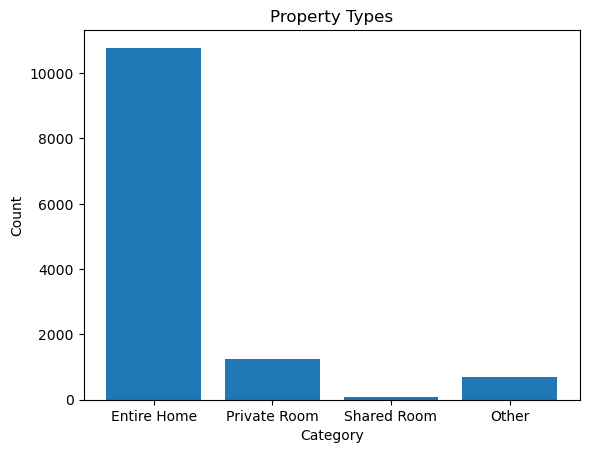

In [19]:
property_categories = {
    'Entire Home': ['Entire home', 'Entire rental unit', 'Entire condo', 'Entire villa', 'Entire serviced apartment', 'Entire vacation home', 'Entire townhouse', 'Entire cottage', 'Entire guesthouse', 'Entire bungalow', 'Entire loft', 'Entire resort', 'Entire timeshare', 'Entire cabin', 'Entire chalet', 'Entire place'],
    'Private Room': ['Private room in home', 'Private room in condo', 'Private room in townhouse', 'Private room in guesthouse', 'Private room in bed and breakfast', 'Private room in rental unit', 'Private room in villa', 'Private room in casa particular', 'Private room in vacation home', 'Private room in tent', 'Private room in minsu', 'Private room in serviced apartment', 'Private room in cottage', 'Private room in farm stay', 'Private room in boat', 'Private room in loft', 'Private room in tiny home', 'Private room in camper/rv', 'Private room in tower', 'Private room in earthen home'],
    'Shared Room': ['Shared room in home', 'Shared room in guest suite', 'Shared room in hostel', 'Shared room in condo', 'Shared room in guesthouse', 'Shared room in casa particular', 'Shared room in aparthotel', 'Shared room in rental unit', 'Shared room in boutique hotel', 'Shared room in townhouse'],
    'Other': ['Private room', 'Room in hotel', 'Room in aparthotel', 'Room in boutique hotel', 'Camper/RV', 'Lighthouse', 'Boat', 'Houseboat', 'Campsite', 'Barn', 'Island', 'Treehouse', 'Farm stay', 'Casa particular', 'Shipping container', 'Castle', 'Room in resort', 'Tent']
}

#  dictionary to store the count of each property category
property_category_counts = {
    'Entire Home': 0,
    'Private Room': 0,
    'Shared Room': 0,
    'Other': 0
}

# occurrences of each property category
for property_type in listings_cleaned_columns_filled['property_type']:
    if property_type in property_categories['Entire Home']:
        property_category_counts['Entire Home'] += 1
    elif property_type in property_categories['Private Room']:
        property_category_counts['Private Room'] += 1
    elif property_type in property_categories['Shared Room']:
        property_category_counts['Shared Room'] += 1
    else:
        property_category_counts['Other'] += 1

# Convert the counts dictionary into separate lists for labels and counts
labels = list(property_category_counts.keys())
counts = list(property_category_counts.values())

# Create a bar plot
plt.bar(labels, counts)

# Set the plot title and axis labels
plt.title('Property Types')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()


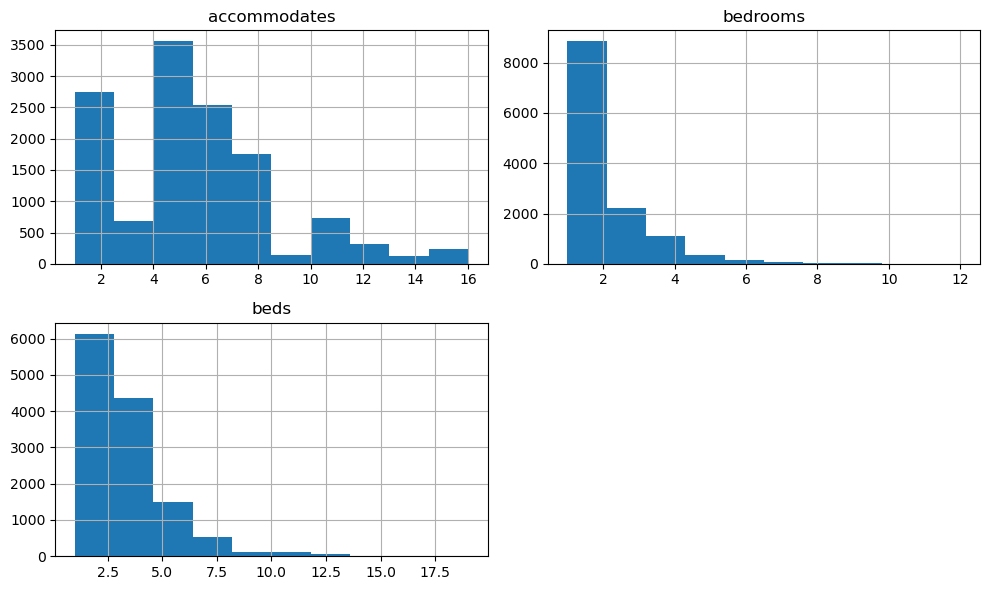

In [39]:
# Histogram of numeric columns
numeric_columns = ['accommodates', 'bedrooms', 'beds']
listings_cleaned_columns_filled[numeric_columns].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

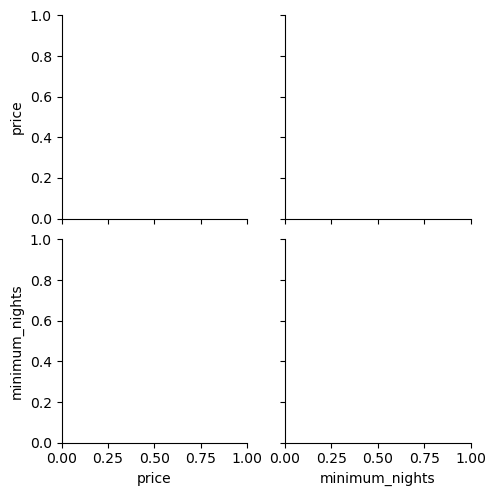

In [38]:
# Scatter plot matrix of numeric columns
numeric_columns = ['price', 'minimum_nights']
sns.pairplot(data=listings_cleaned_columns_filled[numeric_columns])
plt.tight_layout()
plt.show()


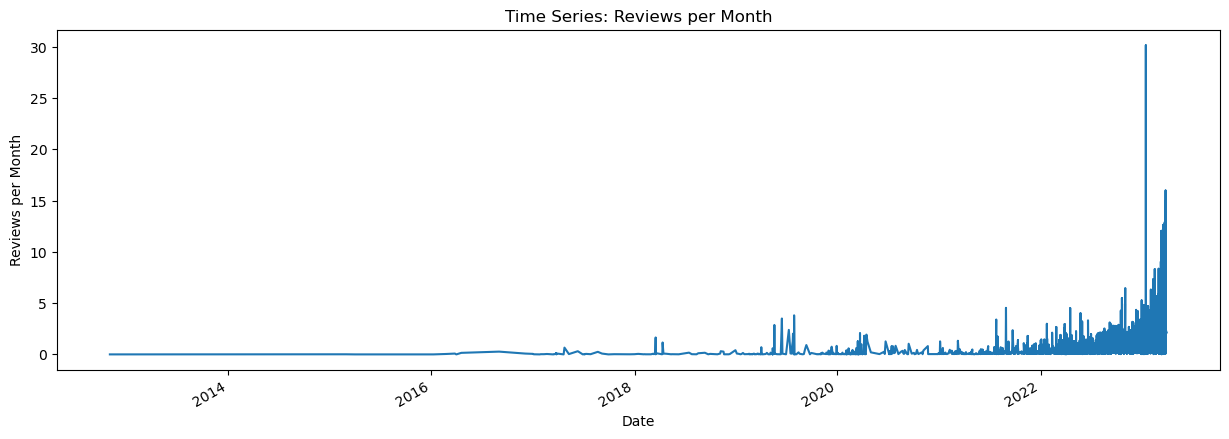

In [24]:
# Time series analysis
time_series_column = 'reviews_per_month'
listings_cleaned_columns_filled['date'] = pd.to_datetime(listings_cleaned_columns_filled['last_review']) 
listings_cleaned_columns_filled.set_index('date', inplace=True)
listings_cleaned_columns_filled[time_series_column].plot(figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Reviews per Month')
plt.title('Time Series: Reviews per Month')
plt.show()
